**Name: -** Chinmay Bhangale

**Registration No.: -** M1910006

**Class: -** B.Tech Mechanical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sensorData.csv", header=0)
df

,relative_time,AmbientLightSensor,CompassSensor
0,0,NaN,8.336974
1,1,NaN,6.782164
2,19,NaN,7.590765
3,54,101.949425,9.602922
4,55,NaN,10.411389
...,...,...,...
391,8486,NaN,91.120099
392,8529,153.494904,NaN
393,8530,NaN,89.939487
394,8552,NaN,89.089463


In [4]:
df.set_index("relative_time", inplace=True)
df.interpolate(method="values", inplace=True)
df

,AmbientLightSensor,CompassSensor
relative_time,,
0,NaN,8.336974
1,NaN,6.782164
19,NaN,7.590765
54,101.949425,9.602922
55,101.949425,10.411389
...,...,...
8486,153.494904,91.120099
8529,153.494904,89.966319
8530,153.494904,89.939487


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=False, inplace=True)
df

,relative_time,AmbientLightSensor,CompassSensor
0,54,101.949425,9.602922
1,55,101.949425,10.411389
2,57,101.949425,10.180528
3,63,101.949425,9.487947
4,86,101.949425,7.870614
...,...,...,...
388,8486,153.494904,91.120099
389,8529,153.494904,89.966319
390,8530,153.494904,89.939487
391,8552,153.494904,89.089463


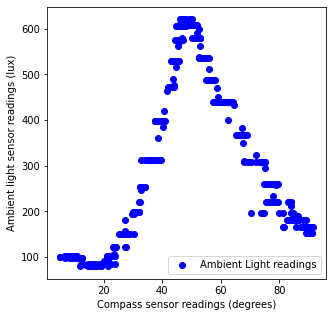

In [6]:
# Visualization
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(5)
ax.scatter(df.iloc[:,[2]], df.iloc[:,[1]], marker="o", c="b", label="Ambient Light readings")
ax.set_xlabel("Compass sensor readings (degrees)")
ax.set_ylabel("Ambient light sensor readings (lux)")
ax.legend()
plt.show()

In [7]:
df.to_csv("cleaned_sensorData.csv", index=False)

In [8]:
# Linear Regression model
new_df = pd.read_csv("cleaned_sensorData.csv", header=0)
X = new_df.iloc[:,[2]]
y = new_df.iloc[:,[1]]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=10)


In [10]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
score_train = lr_model.score(X_train, y_train)
score_test = lr_model.score(X_test, y_test)
print("Score train:", score_train)
print("Score test:", score_test)

Score train: 0.0615033491603596
Score test: 0.09150863035195989


In [12]:
theta0 = lr_model.intercept_[0]
theta1 = lr_model.coef_[0][0]
print("Theta0-", theta0)
print("Theta1-", theta1)

Theta0- 217.24096671181812
Theta1- 1.8604188875457999


Text(0, 0.5, 'Ambient light sensor data (lux)')

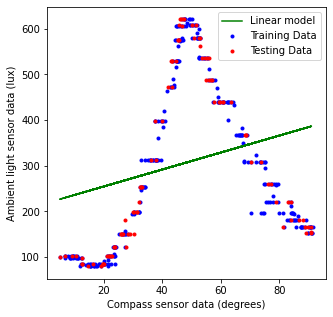

In [15]:
y_test_predictions = lr_model.predict(X_test)
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(5)
ax.scatter(X_train, y_train,marker='.',c='b',label='Training Data')
ax.scatter(X_test, y_test,marker='.',c='r',label='Testing Data')
ax.plot(X_test, y_test_predictions,marker='',c='g',label="Linear model")
ax.legend()
ax.set_xlabel("Compass sensor data (degrees)")
ax.set_ylabel("Ambient light sensor data (lux)")

We can see that a straight line doesn't fit the data properly.

In [16]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pr_model = Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", linear_model.LinearRegression())])
pr_model = pr_model.fit(X_train, y_train)
score_pr_train = pr_model.score(X_train, y_train)
score_pr_test = pr_model.score(X_test, y_test)
print(score_pr_train)
print(score_pr_test)

0.7174944030909585
0.705648566706826


In [17]:
copy_X_test = X_test.copy(deep=True)
copy_X_test.sort_values(by=["CompassSensor"], inplace=True)
pr_predictions = pr_model.predict(copy_X_test)
pr_param_intercept = pr_model.named_steps['linear'].intercept_
print("Theta0-", pr_param_intercept[0])
pr_params = pr_model.named_steps['linear'].coef_
print("Theta1-", pr_params[0][0])
print("Theta2-", pr_params[0][1])
print("Theta3-", pr_params[0][2])

Theta0- -267.6723931047257
Theta1- 0.0
Theta2- 27.503887886989173
Theta3- -0.2588478016111395


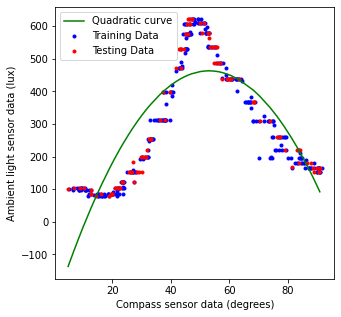

In [18]:
fig, ax = plt.subplots() 
fig.set_figwidth(5)
fig.set_figheight(5)
ax.scatter(X_train, y_train,marker='.',c='b',label='Training Data')
ax.scatter(X_test, y_test,marker='.',c='r',label='Testing Data')
ax.plot(copy_X_test, pr_predictions, "g-", label='Quadratic curve')
ax.set_xlabel("Compass sensor data (degrees)")
ax.set_ylabel("Ambient light sensor data (lux)")
ax.legend()